In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


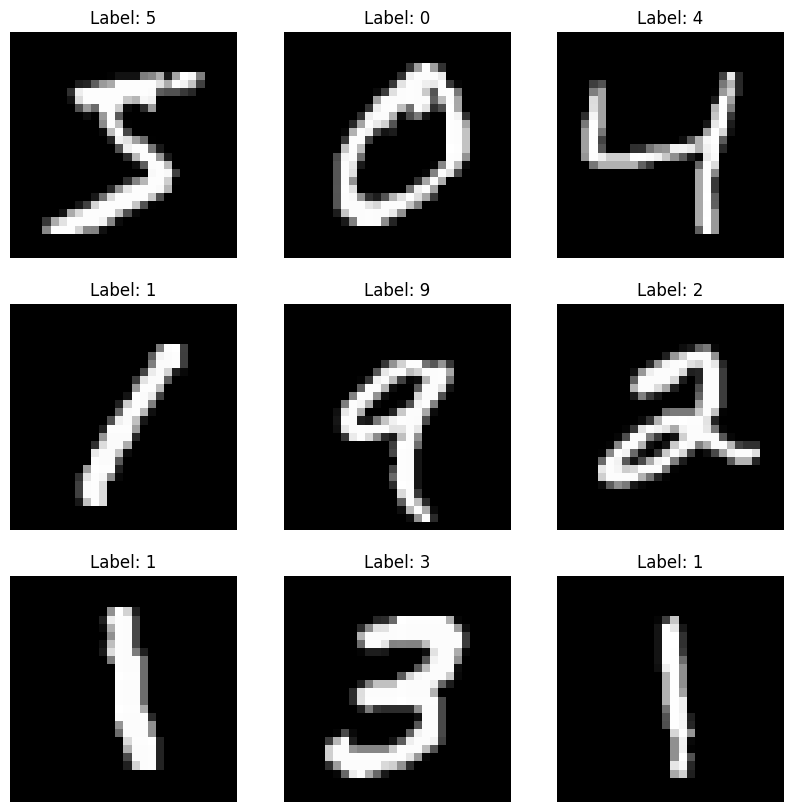

In [3]:
# Plot the first 9 digits from the training set
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()


In [4]:
print(y_train[9])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [5]:
model1 = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten the 28x28 images into 1D
    Dense(128, activation='relu'),         # Fully connected layer with 128 neurons
    Dense(64, activation='relu'),          # Fully connected layer with 64 neurons
    Dense(10, activation='softmax')        # Output layer with 10 neurons for 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model1.fit(
    x_train, y_train,
    validation_split=0.2,   # 20% of training data for validation
    epochs=10,              # Train for 10 epochs
    batch_size=32           # Mini-batch size of 32
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8590 - loss: 0.4809 - val_accuracy: 0.9551 - val_loss: 0.1517
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9664 - loss: 0.1157 - val_accuracy: 0.9633 - val_loss: 0.1193
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9754 - loss: 0.0777 - val_accuracy: 0.9668 - val_loss: 0.1048
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9825 - loss: 0.0558 - val_accuracy: 0.9704 - val_loss: 0.1046
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9865 - loss: 0.0417 - val_accuracy: 0.9721 - val_loss: 0.0950
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9899 - loss: 0.0320 - val_accuracy: 0.9732 - val_loss: 0.0976
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9918 - loss: 0.0244 - val_accuracy: 0.9758 - val_loss: 0.1020
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9932 - loss: 0.021

In [8]:
test_loss, test_accuracy = model1.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9651 - loss: 0.1572
Test Accuracy: 96.93%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


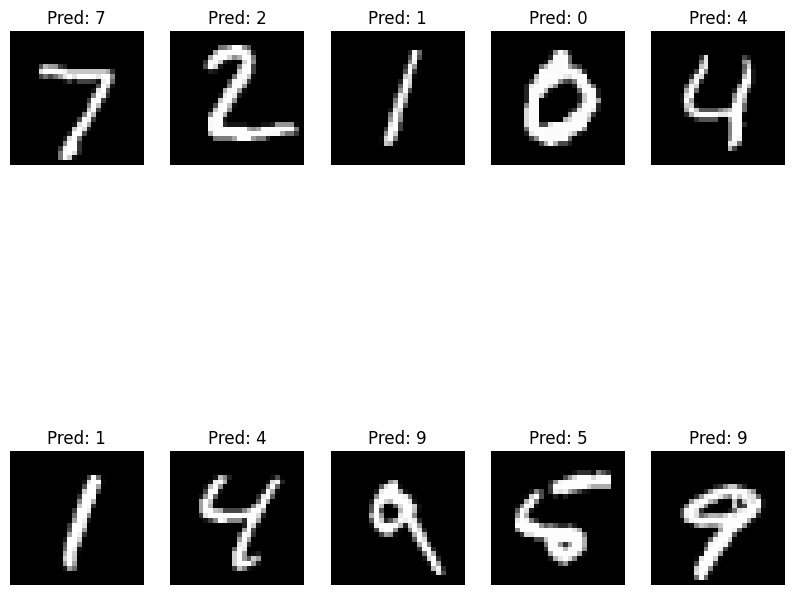

In [9]:
# Predict the first 10 images in the test set
predictions = model1.predict(x_test[:10])

# Visualize the predictions
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


In [10]:
model1.save('digit_recognition_model1.h5')


In [11]:
from tensorflow.keras.layers import Dropout

model2 = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten the 28x28 images into 1D
    Dense(128, activation='relu'),
    Dropout(0.3),                           # Dropout layer with 30% dropout
    Dense(64, activation='relu'),
    Dropout(0.3),                           # Dropout layer with 30% dropout
    Dense(10, activation='softmax')         # Output layer with 10 neurons for 10 classes
])

In [12]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
history = model2.fit(
    x_train, y_train,
    validation_split=0.2,   # 20% of training data for validation
    epochs=10,              # Train for 10 epochs
    batch_size=32           # Mini-batch size of 32
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7744 - loss: 0.7048 - val_accuracy: 0.9517 - val_loss: 0.1658
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9345 - loss: 0.2272 - val_accuracy: 0.9648 - val_loss: 0.1259
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9466 - loss: 0.1772 - val_accuracy: 0.9687 - val_loss: 0.1092
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9545 - loss: 0.1474 - val_accuracy: 0.9696 - val_loss: 0.1022
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9617 - loss: 0.1258 - val_accuracy: 0.9728 - val_loss: 0.0915
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9661 - loss: 0.1162 - val_accuracy: 0.9734 - val_loss: 0.0937
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9684 - loss: 0.1064 - val_accuracy: 0.9737 - val_loss: 0.0891
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9685 - loss: 0.10

In [14]:
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0953
Test Accuracy: 97.67%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


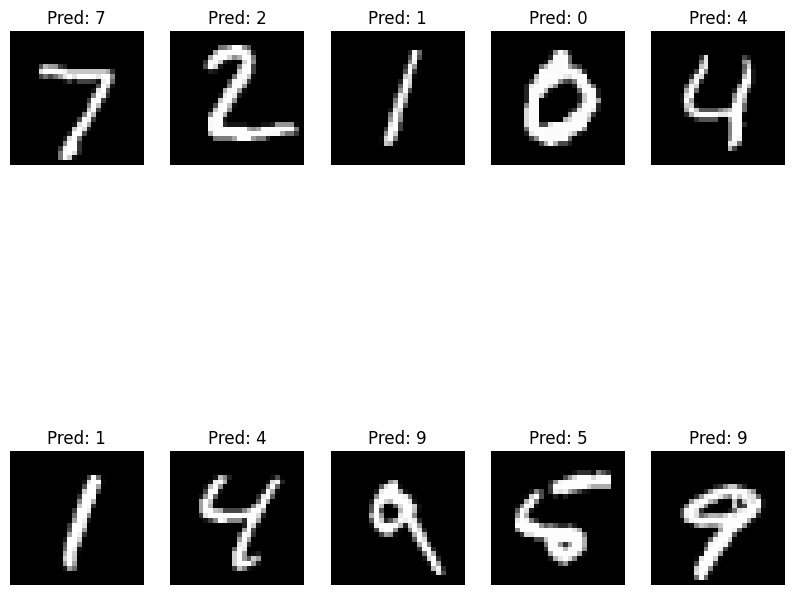

In [15]:
# Predict the first 10 images in the test set
predictions = model2.predict(x_test[:10])

# Visualize the predictions
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


In [16]:
model2.save('digit_recognition_model2.h5')